In [1]:
import matplotlib
import pandas as pd
from common.clustering import *
from common.outliers import find_outliers_in_multiple_columns, plot_2d_data_with_outliers
from common.standardization import standardize

matplotlib.rcParams['figure.figsize'] = [7, 7]

### Constants and settings

In [2]:
columns_used_for_clustering = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [3]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=columns_used_for_clustering)

### Data stats for each column

In [4]:
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_used_for_clustering})
print(columns_stats.to_string())

          User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales
max     9.600000e+00     99.000000  28.960000  41.360000  10.220000
min     8.881784e-16     13.000000   0.000000   0.000000   0.000000
std     1.302502e+00     12.449681   0.622661   1.002670   0.385861
mean    7.270068e+00     70.942011   0.225307   0.402908   0.108312
median  7.500000e+00     72.400000   0.070000   0.170000   0.000000


### Data standardization

In [5]:
standardize(data, columns_used_for_clustering, columns_stats)

### Outliers detection - 5 dimensions

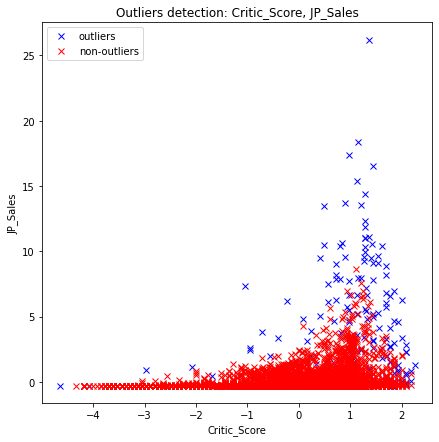

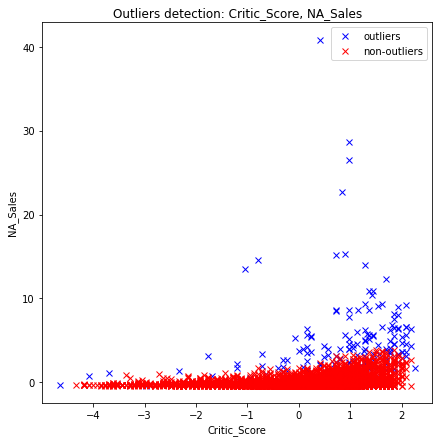

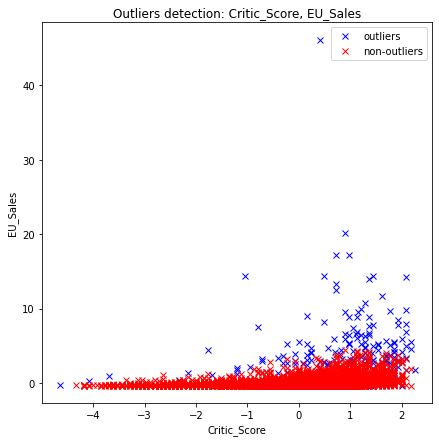

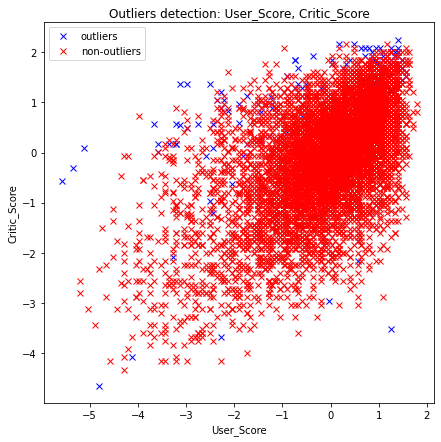

In [6]:
k_neighbours = 5
r_percentage = 0.02
outliers, non_outliers = find_outliers_in_multiple_columns(data, columns_used_for_clustering, k_neighbours, r_percentage)

plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "JP_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "NA_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("Critic_Score", "EU_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "Critic_Score"))

## Clustering - analysis
Used variables:
 - Critic_Score
 - User_Score
 - EU_Sales
 - NA_Sales
 - JP_Sales

We use all numeric variables except Global_Sales and Year_of_Release (this may change later).

### Silhouette score analysis
First, we perform clustering analysis using the **silhouette** coefficient, to get the optimal number of clusters.
This will take some time ...

Performing Silhouette score analysis ... 

Used method: K-Means
Score for 2 clusters 0.35597498481500034 (+-0.00014975129874402658)
Score for 3 clusters 0.26494650590834923 (+-0.0006310764074125378)
Score for 4 clusters 0.2868376461118679 (+-0.0014092630117554569)
Score for 5 clusters 0.30104415160995224 (+-0.0010753555390873965)
Score for 6 clusters 0.28319399010744606 (+-0.0015781654615741254)
Score for 7 clusters 0.2620510401884614 (+-0.0002806132432516745)
Score for 8 clusters 0.2503782866457412 (+-0.0007183818942501127)
Score for 9 clusters 0.23354395242066286 (+-0.0015297553244106438)
Score for 10 clusters 0.24075828135648641 (+-0.0041700201917591745)
Score for 11 clusters 0.23945836688079447 (+-0.004005952329720358)
Score for 12 clusters 0.23949258944993948 (+-0.000568264158543831)
Score for 13 clusters 0.23335079245427165 (+-0.009217292154952962)
Score for 14 clusters 0.2316971128383576 (+-0.003231401734046511)
Score for 15 clusters 0.23509739155156972 (+-0.0009513339255038759)

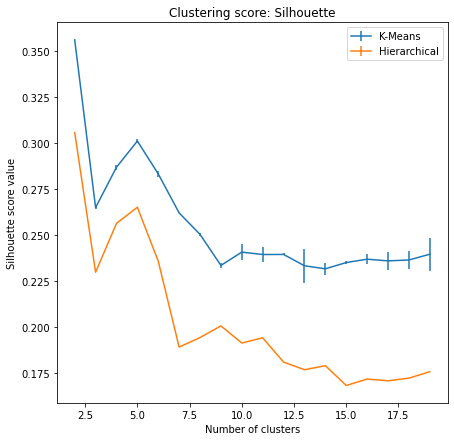

In [7]:
print("Performing Silhouette score analysis ... ")
numbers_of_clusters = range(2, 20)

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_silhouette, outliers, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_silhouette, outliers, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Silhouette")

### Caliński-Harabasz score analysis
We also perform clustering analysis using different score calculating technique - **Calinski-Harabasz** score.
This will also take some time...

Performing Calinski-Harabasz score analysis ... 

Used method: K-Means
Score for 2 clusters 5726.302355549015 (+-0.04868798398307466)
Score for 3 clusters 4670.038013650542 (+-0.04551878673298256)
Score for 4 clusters 4251.928615068765 (+-5.372782889511854)
Score for 5 clusters 4219.289671230529 (+-0.1959932320436012)
Score for 6 clusters 4075.784846613505 (+-0.44479620016946975)
Score for 7 clusters 4048.077628853028 (+-0.13415280157223727)
Score for 8 clusters 3840.0684022145892 (+-13.079034357070363)
Score for 9 clusters 3692.621237610443 (+-2.3455979784646397)
Score for 10 clusters 3606.8007957064174 (+-0.5846256759202951)
Score for 11 clusters 3516.55400241267 (+-1.7761411845228265)
Score for 12 clusters 3437.127544790188 (+-0.9760392385580372)
Score for 13 clusters 3336.497033689341 (+-5.242755331581046)
Score for 14 clusters 3260.0868999621875 (+-9.715155953321313)
Score for 15 clusters 3201.385502953239 (+-12.211355618487836)
Score for 16 clusters 3138.4521059320855 (+-9.868409

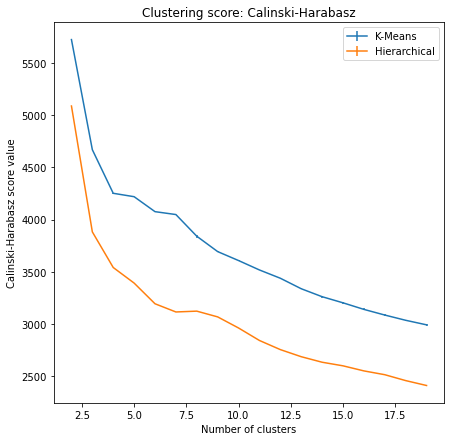

In [8]:
print("Performing Calinski-Harabasz score analysis ... ")
numbers_of_clusters = range(2, 20)

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_calinski_harabasz, outliers, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_calinski_harabasz, outliers, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Calinski-Harabasz")
